In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Standardize the features (important for gradient-based models like GradientBoosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [6]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

In [7]:
# Train AdaBoost Regressor
ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ab_model.fit(X_train_scaled, y_train)


AdaBoostRegressor(n_estimators=100, random_state=42)

In [8]:
# Evaluate Random Forest Regressor
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("R-squared:", r2_score(y_test, rf_pred))

# Evaluate Gradient Boosting Regressor
gb_pred = gb_model.predict(X_test_scaled)
print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, gb_pred))
print("R-squared:", r2_score(y_test, gb_pred))

# Evaluate AdaBoost Regressor
ab_pred = ab_model.predict(X_test_scaled)
print("\nAdaBoost Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, ab_pred))
print("R-squared:", r2_score(y_test, ab_pred))


Random Forest Regressor:
Mean Squared Error: 0.255169737347244
R-squared: 0.8052747336256919

Gradient Boosting Regressor:
Mean Squared Error: 0.29399901242474274
R-squared: 0.7756433164710084

AdaBoost Regressor:
Mean Squared Error: 0.614478459432694
R-squared: 0.5310788695468394


In [10]:
# Hyperparameter tuning for Random Forest using GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3)
rf_grid_search.fit(X_train_scaled, y_train)
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)

# Hyperparameter tuning for Gradient Boosting using GridSearchCV
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3)
gb_grid_search.fit(X_train_scaled, y_train)
print("\nBest Gradient Boosting Parameters:", gb_grid_search.best_params_)

ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

ab_grid_search = GridSearchCV(estimator=AdaBoostRegressor(random_state=42), param_grid=ab_param_grid, cv=3)
ab_grid_search.fit(X_train_scaled, y_train)
print("\nBest AdaBoost Parameters:", ab_grid_search.best_params_)



Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}

Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'n_estimators': 200}

Best AdaBoost Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [11]:
# Use the best models to predict
rf_best = rf_grid_search.best_estimator_
gb_best = gb_grid_search.best_estimator_
ab_best = ab_grid_search.best_estimator_

# Evaluate the optimized models
rf_best_pred = rf_best.predict(X_test_scaled)
print("\nOptimized Random Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_best_pred))
print("R-squared:", r2_score(y_test, rf_best_pred))

gb_best_pred = gb_best.predict(X_test_scaled)
print("\nOptimized Gradient Boosting:")
print("Mean Squared Error:", mean_squared_error(y_test, gb_best_pred))
print("R-squared:", r2_score(y_test, gb_best_pred))

ab_best_pred = ab_best.predict(X_test_scaled)
print("\nOptimized AdaBoost:")
print("Mean Squared Error:", mean_squared_error(y_test, ab_best_pred))
print("R-squared:", r2_score(y_test, ab_best_pred))



Optimized Random Forest:
Mean Squared Error: 0.25381644520158614
R-squared: 0.8063074586513359

Optimized Gradient Boosting:
Mean Squared Error: 0.24360078693969622
R-squared: 0.8141032372452857

Optimized AdaBoost:
Mean Squared Error: 0.5650494684895984
R-squared: 0.5687991475393247


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


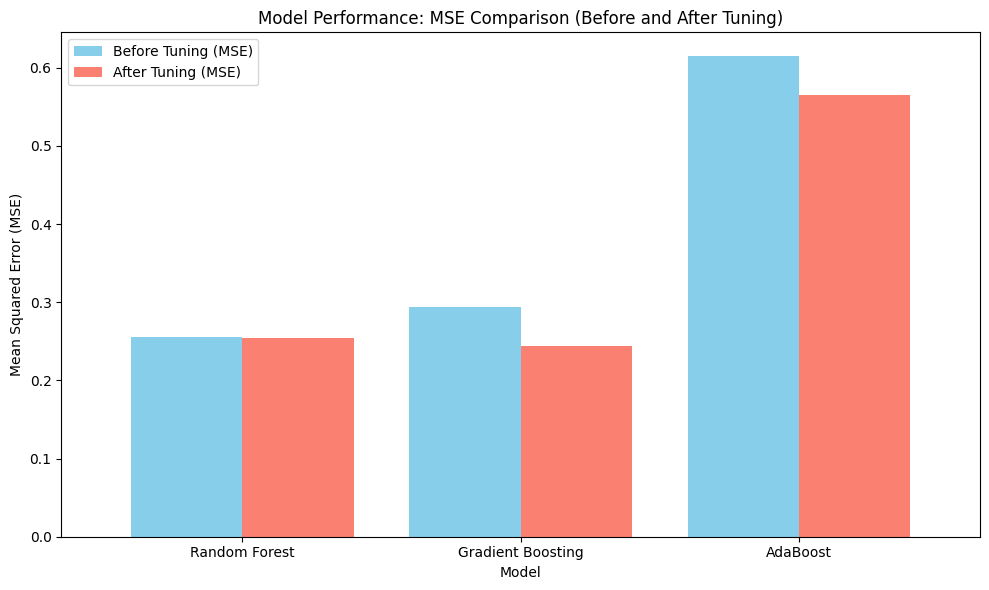

In [13]:
# Calculate MSE for each model
mse_rf = mean_squared_error(y_test, rf_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
mse_ab = mean_squared_error(y_test, ab_pred)

# Optimized model MSE after GridSearchCV
mse_rf_best = mean_squared_error(y_test, rf_best_pred)
mse_gb_best = mean_squared_error(y_test, gb_best_pred)
mse_ab_best = mean_squared_error(y_test, ab_best_pred)

# Create DataFrame for easy visualization
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
mse_before = [mse_rf, mse_gb, mse_ab]
mse_after = [mse_rf_best, mse_gb_best, mse_ab_best]

df_mse = pd.DataFrame({
    'Model': models,
    'Before Tuning (MSE)': mse_before,
    'After Tuning (MSE)': mse_after
})

# Plot bar chart
df_mse.set_index('Model').plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'salmon'])
plt.title('Model Performance: MSE Comparison (Before and After Tuning)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


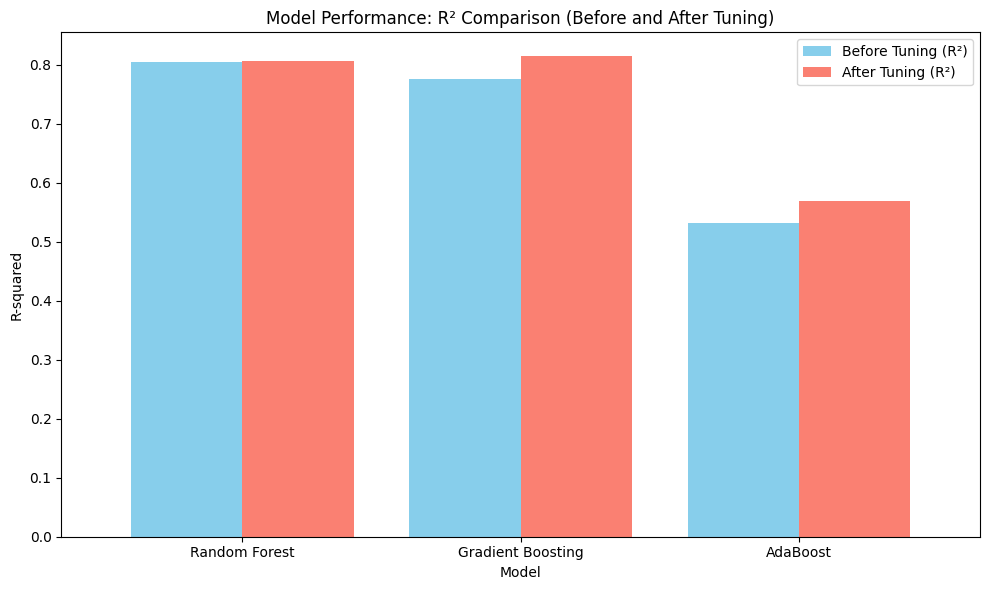

In [14]:
# Calculate R-squared for each model
r2_rf = r2_score(y_test, rf_pred)
r2_gb = r2_score(y_test, gb_pred)
r2_ab = r2_score(y_test, ab_pred)

# Optimized model R-squared after GridSearchCV
r2_rf_best = r2_score(y_test, rf_best_pred)
r2_gb_best = r2_score(y_test, gb_best_pred)
r2_ab_best = r2_score(y_test, ab_best_pred)

# Create DataFrame for easy visualization
r2_before = [r2_rf, r2_gb, r2_ab]
r2_after = [r2_rf_best, r2_gb_best, r2_ab_best]

df_r2 = pd.DataFrame({
    'Model': models,
    'Before Tuning (R²)': r2_before,
    'After Tuning (R²)': r2_after
})

# Plot bar chart
df_r2.set_index('Model').plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'salmon'])
plt.title('Model Performance: R² Comparison (Before and After Tuning)')
plt.ylabel('R-squared')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


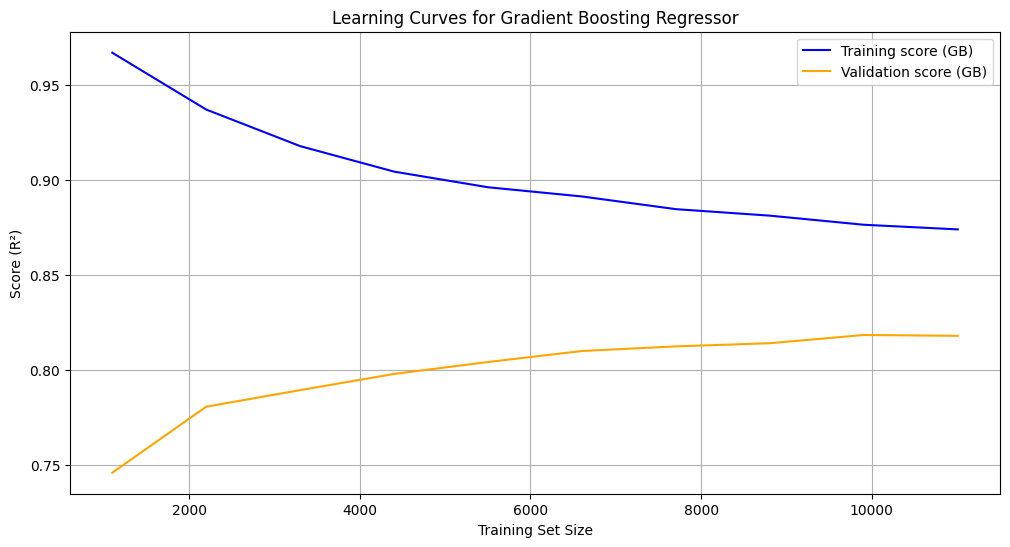

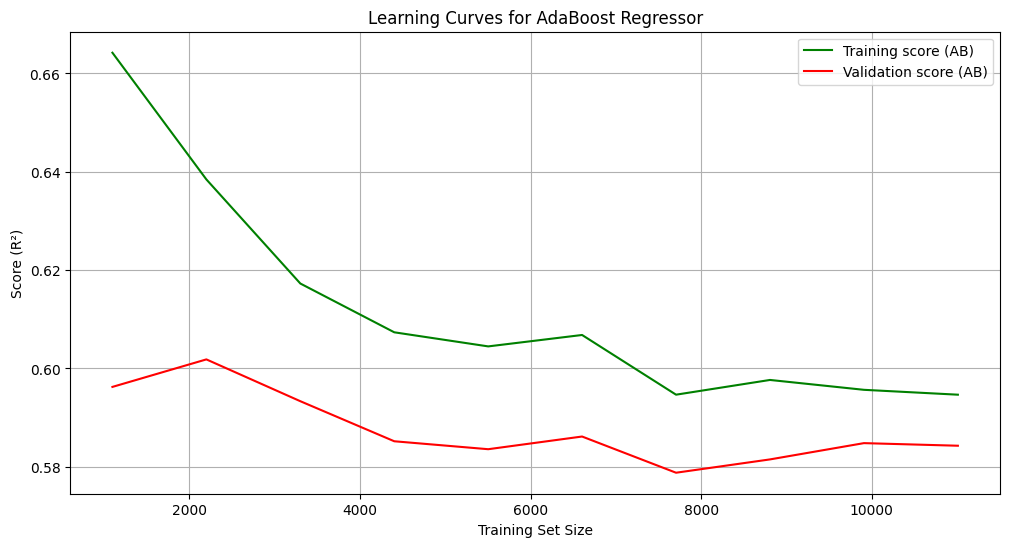

In [15]:
from sklearn.model_selection import learning_curve

# Plot learning curves for Gradient Boosting Regressor
train_sizes, train_scores, valid_scores = learning_curve(
    gb_best, X_train_scaled, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves for AdaBoost Regressor
train_sizes_ab, train_scores_ab, valid_scores_ab = learning_curve(
    ab_best, X_train_scaled, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score (GB)', color='blue')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score (GB)', color='orange')
plt.title('Learning Curves for Gradient Boosting Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Score (R²)')
plt.legend()
plt.grid(True)
plt.show()

# Plot learning curves for AdaBoost
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_ab, np.mean(train_scores_ab, axis=1), label='Training score (AB)', color='green')
plt.plot(train_sizes_ab, np.mean(valid_scores_ab, axis=1), label='Validation score (AB)', color='red')
plt.title('Learning Curves for AdaBoost Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Score (R²)')
plt.legend()
plt.grid(True)
plt.show()

